# Run the whole deltas algorithm

In [38]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

Pima Indian Diabetes: 768
Classes total: 500 - 268

Classes train: 350 - 187
Classes test:  150 - 81


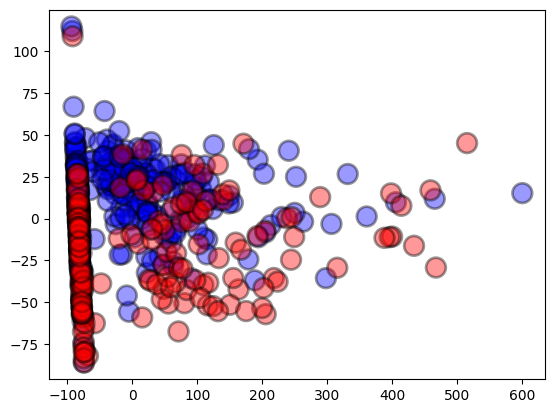

In [39]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[2]  # change ind to select dataset to use
model = 'MLP'

dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'

# dataset = datasets[7]  # change ind to select dataset to use
data_clf = data.get_real_dataset(dataset, scale=False)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

original


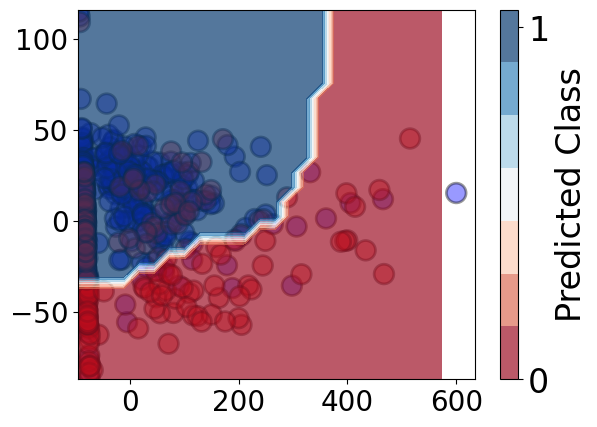

SMOTE


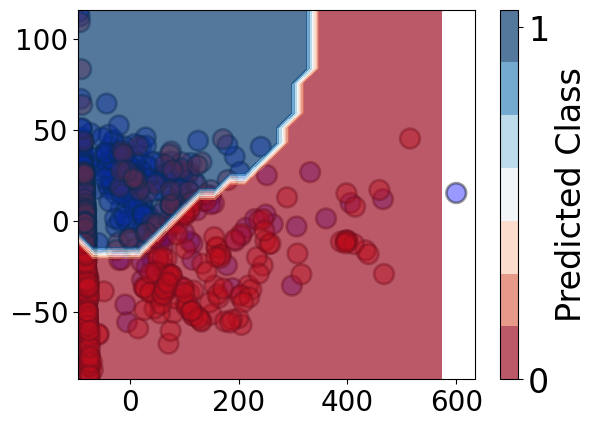

balanced_weights


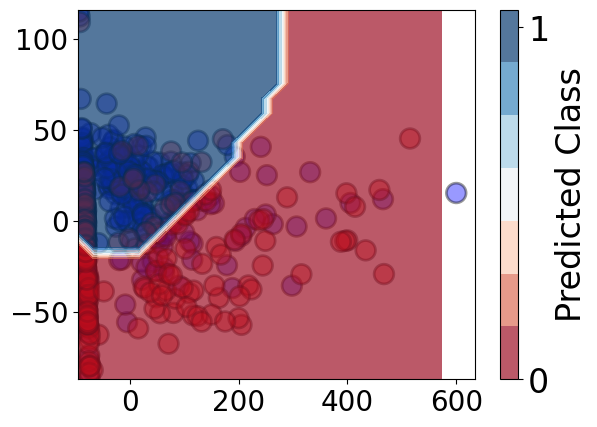

Bayes Minimum Risk


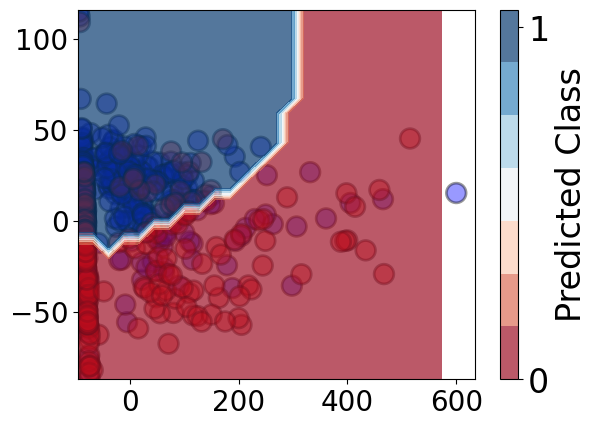

Bayes Minimum Risk (Not calibrated)


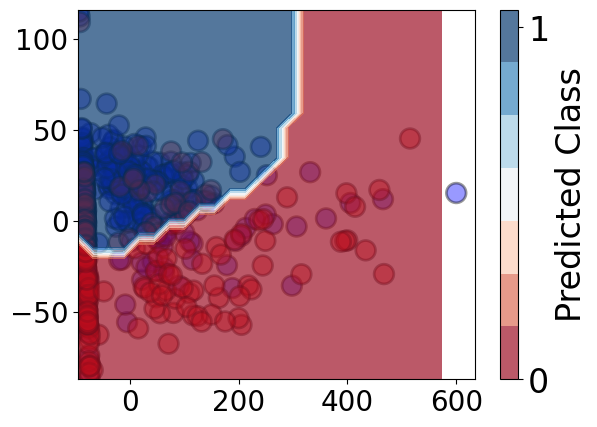

Thresholding


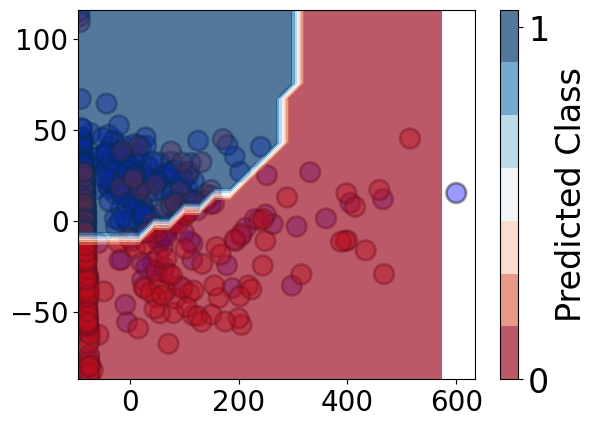

In [40]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Baseline']

## Fit deltas

Original Data


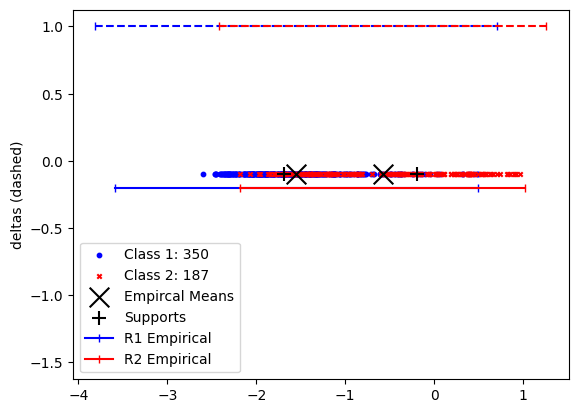

Budget 535 found 186 viable downsampled solutions
Best solution found by removing 276 data points
Downsampled Data:


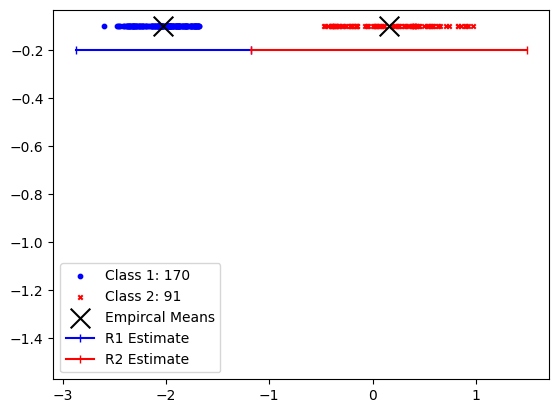

In [41]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=0,
                                                     _print=True, 
                                                     _plot=True, 
                                                     max_trials=1000, 
                                                     method='supports-prop-update_mean-margin_only',
                                                     parallel=True)

## Plot training data information

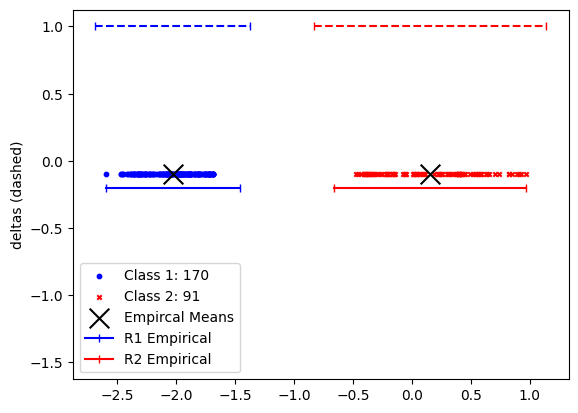

In [42]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [43]:
deltas_model.print_params()

Parameters
                R:  2.595969892406039
                N1: 170
                N2: 91
                R1: 0.5701790853865454
                R2: 0.8151563913043861
                M:  0.7966088888586206
                D:  2.181944365549552
                C1: 1
                C2: 1


# Evaluation on test data

                                     accuracy    G-Mean   ROC-AUC  \
Method                                                              
original                             0.753247  0.625915  0.676543   
SMOTE                                0.748918  0.734343  0.735679   
balanced_weights                     0.731602  0.724867  0.725185   
Bayes Minimum Risk                   0.740260  0.731310  0.731852   
Bayes Minimum Risk (Not calibrated)  0.740260  0.724640  0.726173   
Thresholding                         0.731602  0.724867  0.725185   
deltas                               0.735931  0.724867  0.725679   

                                     precision1 (red)  precision2 (blue)  \
Method                                                                     
original                                     0.748663           0.772727   
SMOTE                                        0.823944           0.629213   
balanced_weights                             0.823529           0.600000  

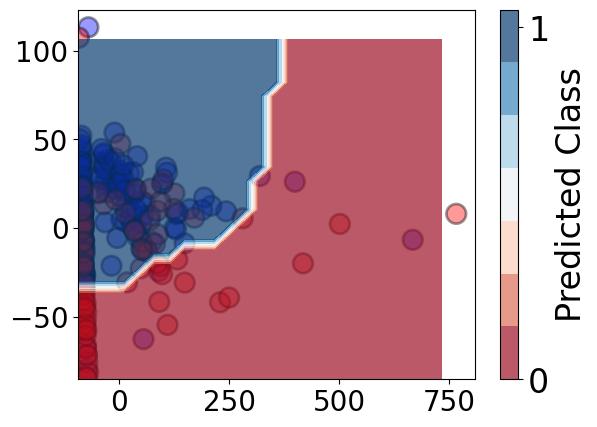

SMOTE


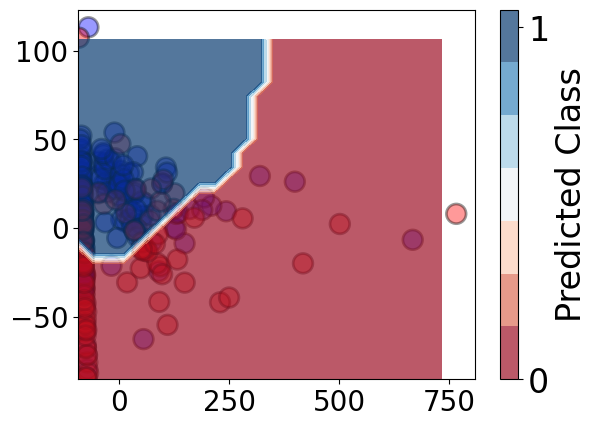

balanced_weights


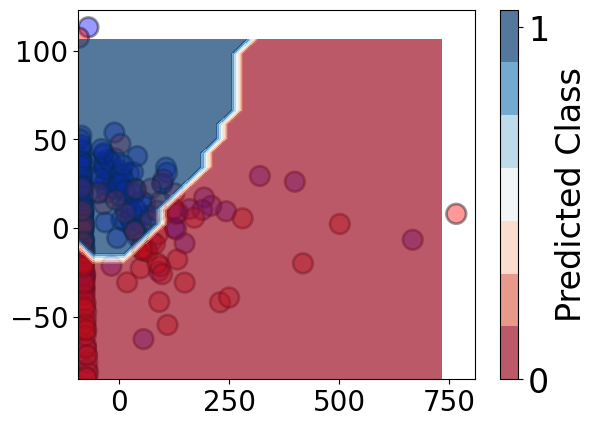

Bayes Minimum Risk


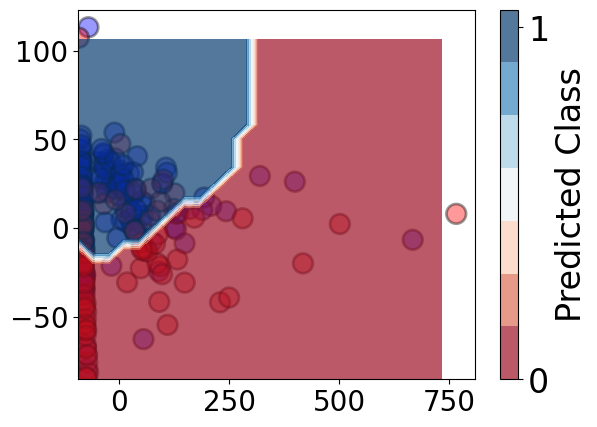

Bayes Minimum Risk (Not calibrated)


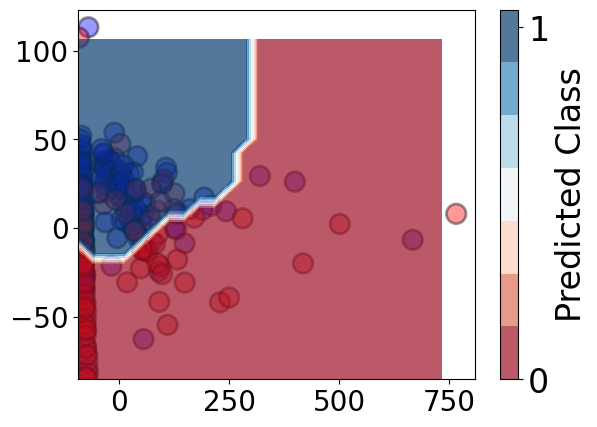

Thresholding


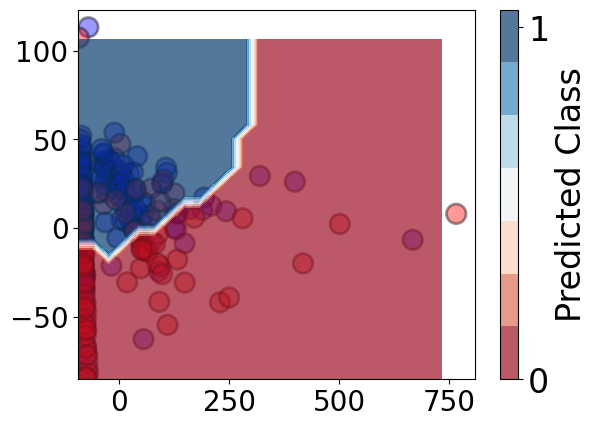

deltas


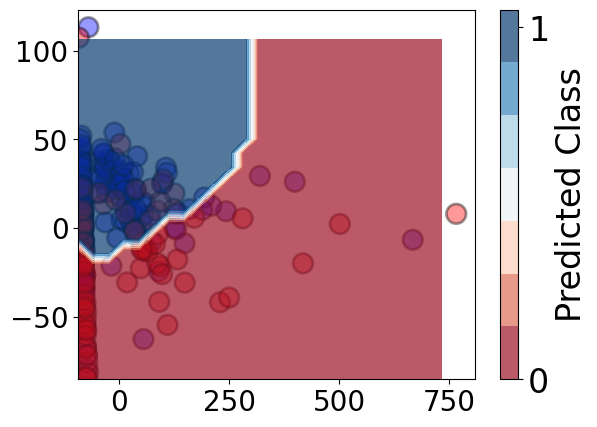

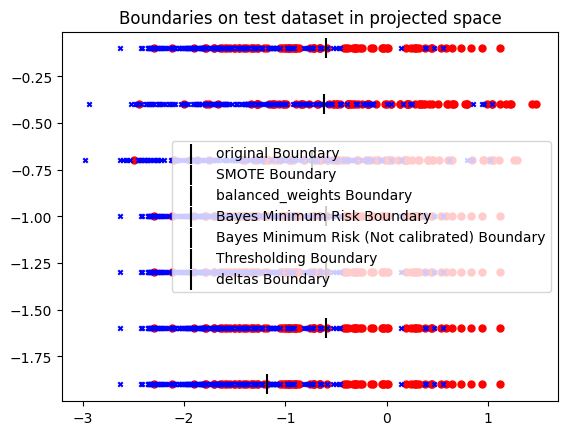

LATEX table format


\begin{tabular}{lrrrrrrrrl}
\toprule
 & accuracy & G-Mean & ROC-AUC & precision1 (red) & precision2 (blue) & precision & recall & F1 & F-score-1 \\
Method &  &  &  &  &  &  &  &  &  \\
\midrule
original & 0.753247 & 0.625915 & 0.676543 & 0.748663 & 0.772727 & 0.748663 & 0.933333 & 0.544000 & [0.83086053 0.544     ] \\
SMOTE & 0.748918 & 0.734343 & 0.735679 & 0.823944 & 0.629213 & 0.823944 & 0.780000 & 0.658824 & [0.80136986 0.65882353] \\
balanced_weights & 0.731602 & 0.724867 & 0.725185 & 0.823529 & 0.600000 & 0.823529 & 0.746667 & 0.647727 & [0.78321678 0.64772727] \\
Bayes Minimum Risk & 0.740260 & 0.731310 & 0.731852 & 0.826087 & 0.612903 & 0.826087 & 0.760000 & 0.655172 & [0.79166667 0.65517241] \\
Bayes Minimum Risk (Not calibrated) & 0.740260 & 0.724640 & 0.726173 & 0.816901 & 0.617978 & 0.816901 & 0.773333 & 0.647059 & [0.79452055 0.64705882] \\
Thresholding & 0.731602 & 0.724867 & 0.725185 & 0.823529 & 0.600000 & 0.823529 & 0.746667 & 0.647727 & [0.7832167

,accuracy,G-Mean,ROC-AUC,precision1 (red),precision2 (blue),precision,recall,F1,F-score-1
Method,,,,,,,,,
original,0.753247,0.625915,0.676543,0.748663,0.772727,0.748663,0.933333,0.544000,"[0.830860534124629, 0.544]"
SMOTE,0.748918,0.734343,0.735679,0.823944,0.629213,0.823944,0.780000,0.658824,"[0.8013698630136986, 0.6588235294117647]"
balanced_weights,0.731602,0.724867,0.725185,0.823529,0.600000,0.823529,0.746667,0.647727,"[0.7832167832167831, 0.6477272727272727]"
Bayes Minimum Risk,0.740260,0.731310,0.731852,0.826087,0.612903,0.826087,0.760000,0.655172,"[0.7916666666666667, 0.6551724137931035]"
Bayes Minimum Risk (Not calibrated),0.740260,0.724640,0.726173,0.816901,0.617978,0.816901,0.773333,0.647059,"[0.7945205479452055, 0.6470588235294118]"
Thresholding,0.731602,0.724867,0.725185,0.823529,0.600000,0.823529,0.746667,0.647727,"[0.7832167832167831, 0.6477272727272727]"
deltas,0.735931,0.724867,0.725679,0.820144,0.608696,0.820144,0.760000,0.647399,"[0.7889273356401384, 0.6473988439306358]"


In [44]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])